# Positonal Encoding

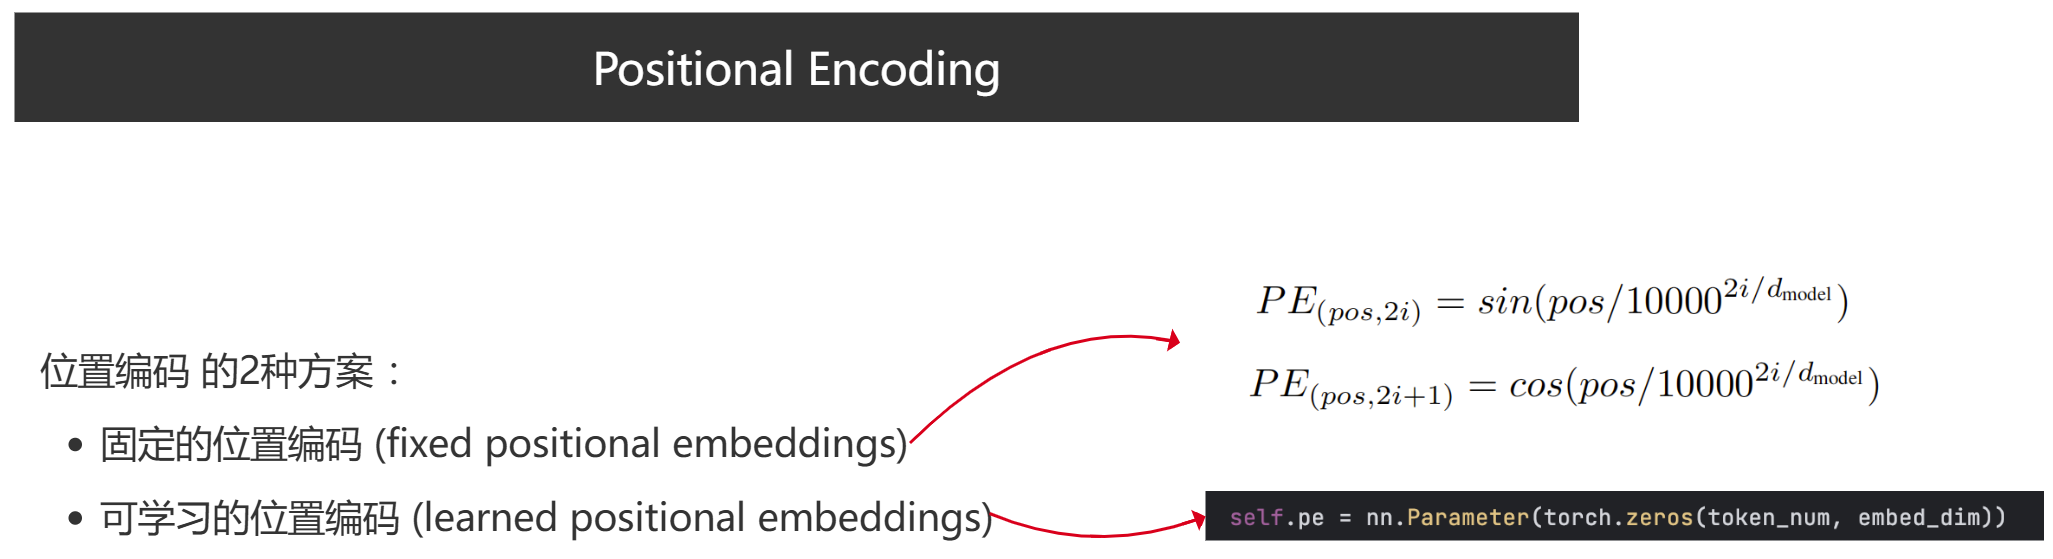

### 为什么需要位置编码

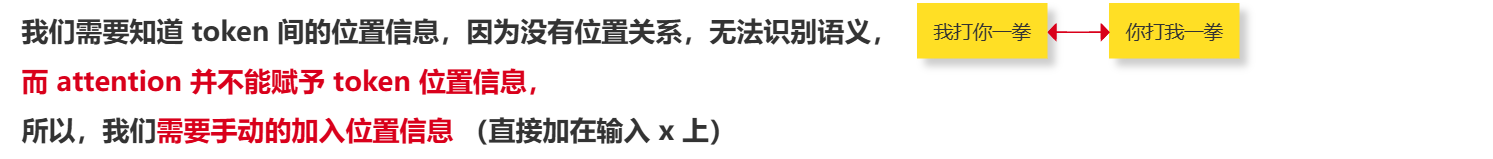

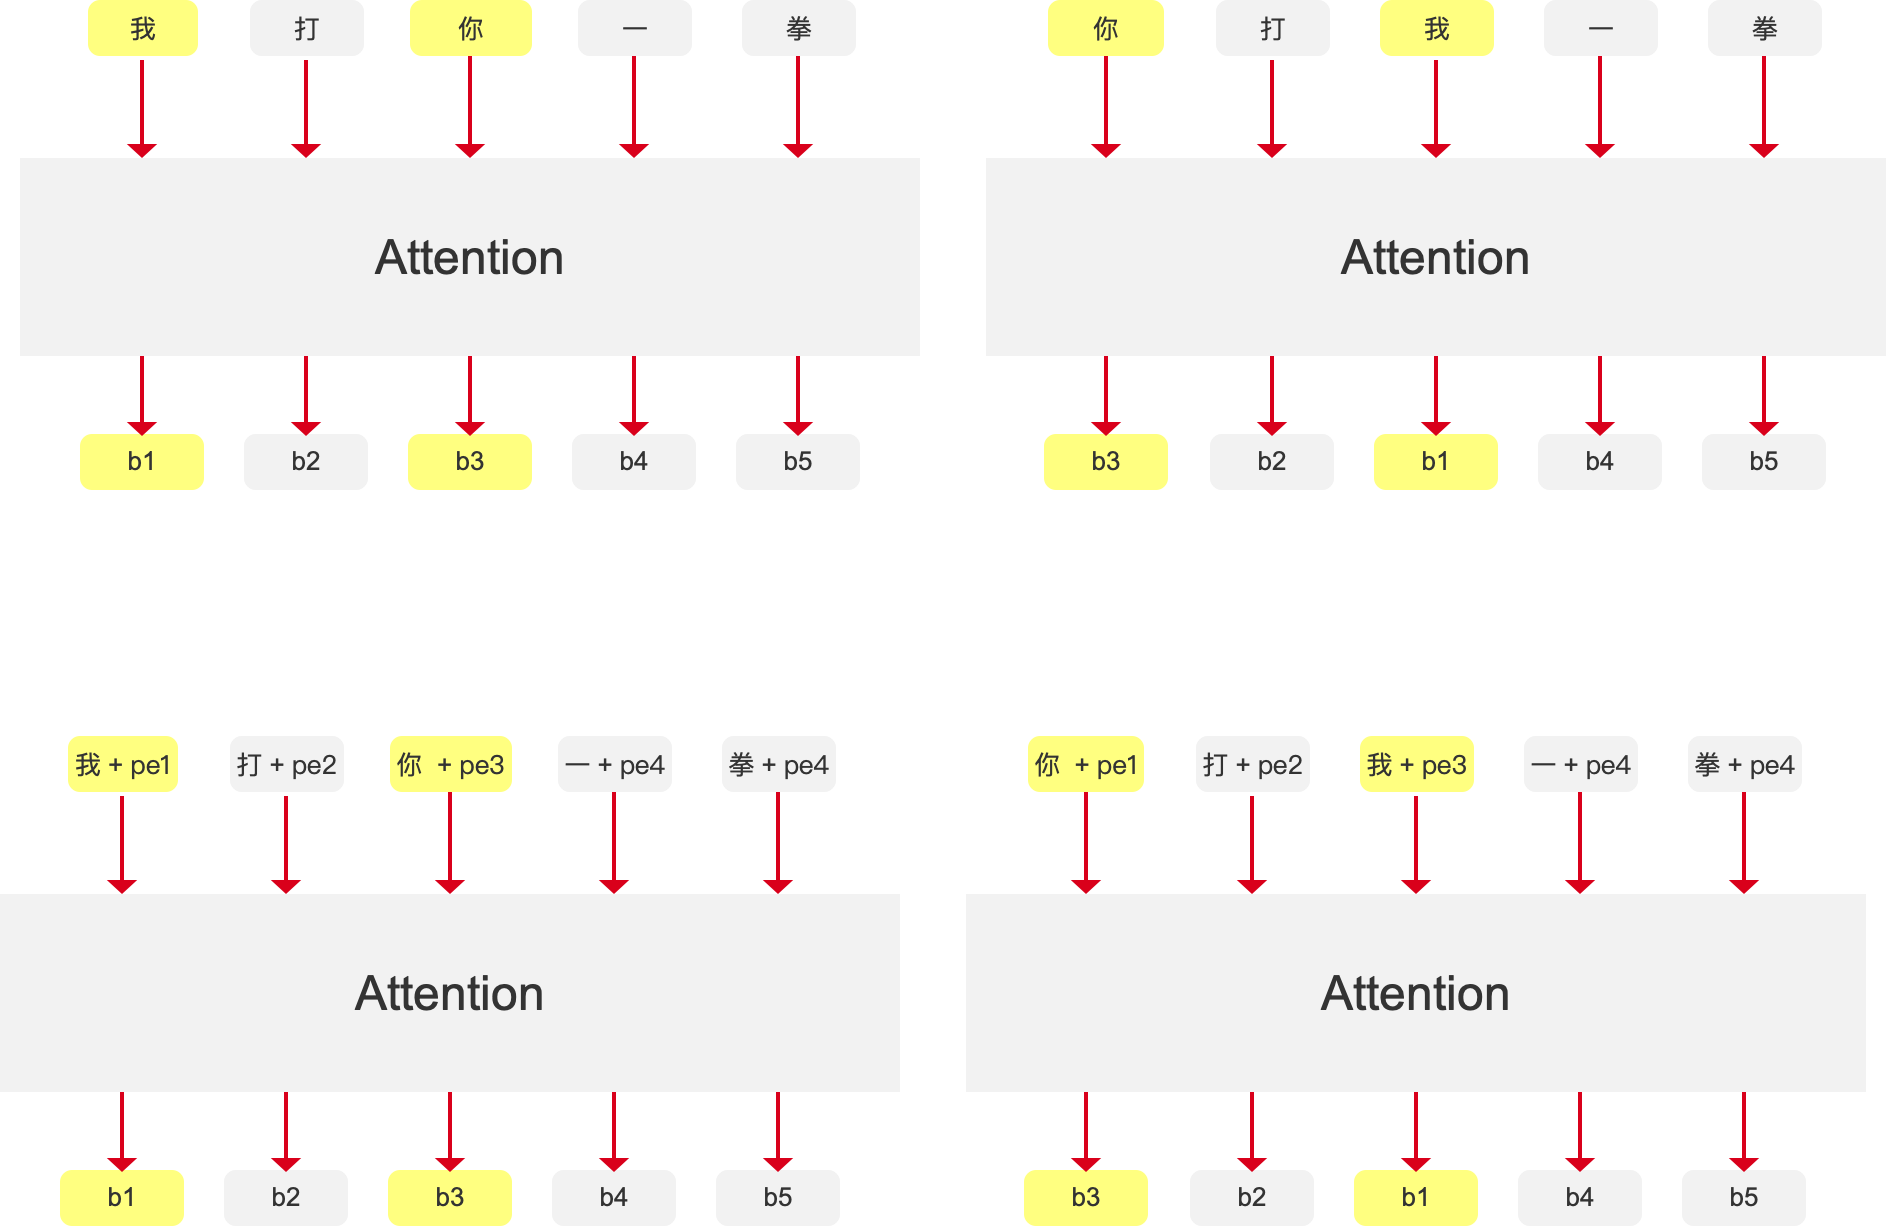

### 公式详解 ： 绝对位置 、 相对位置

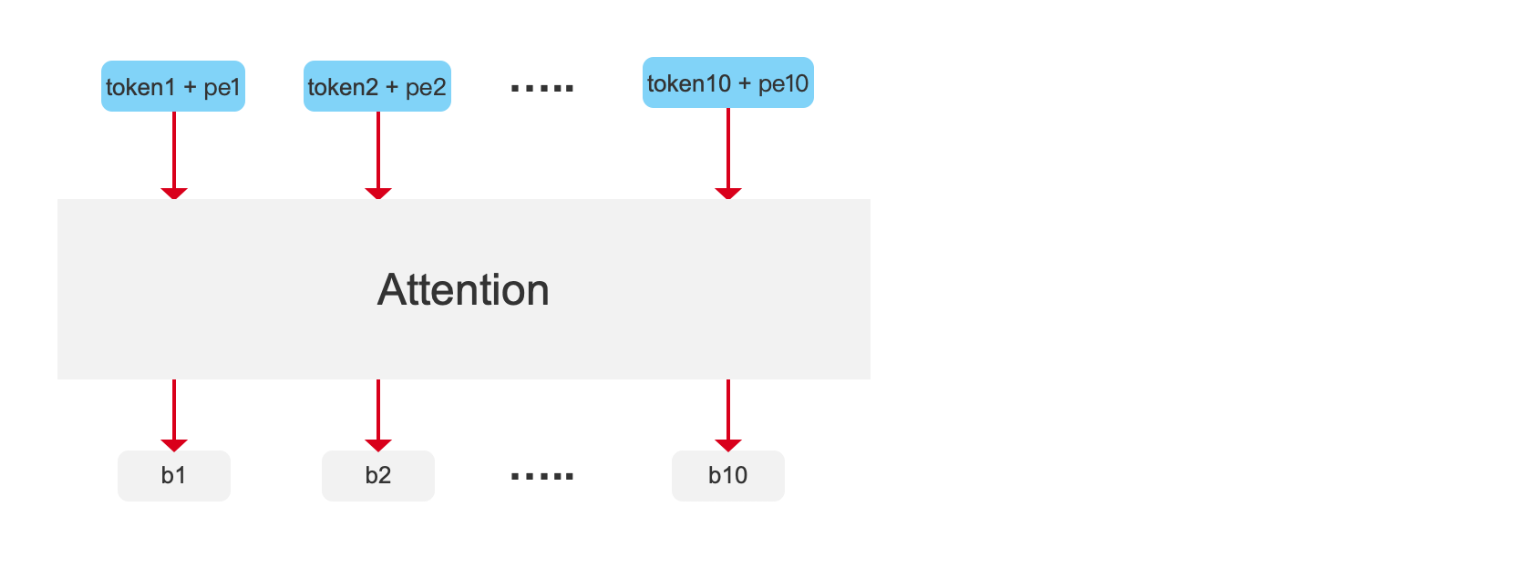

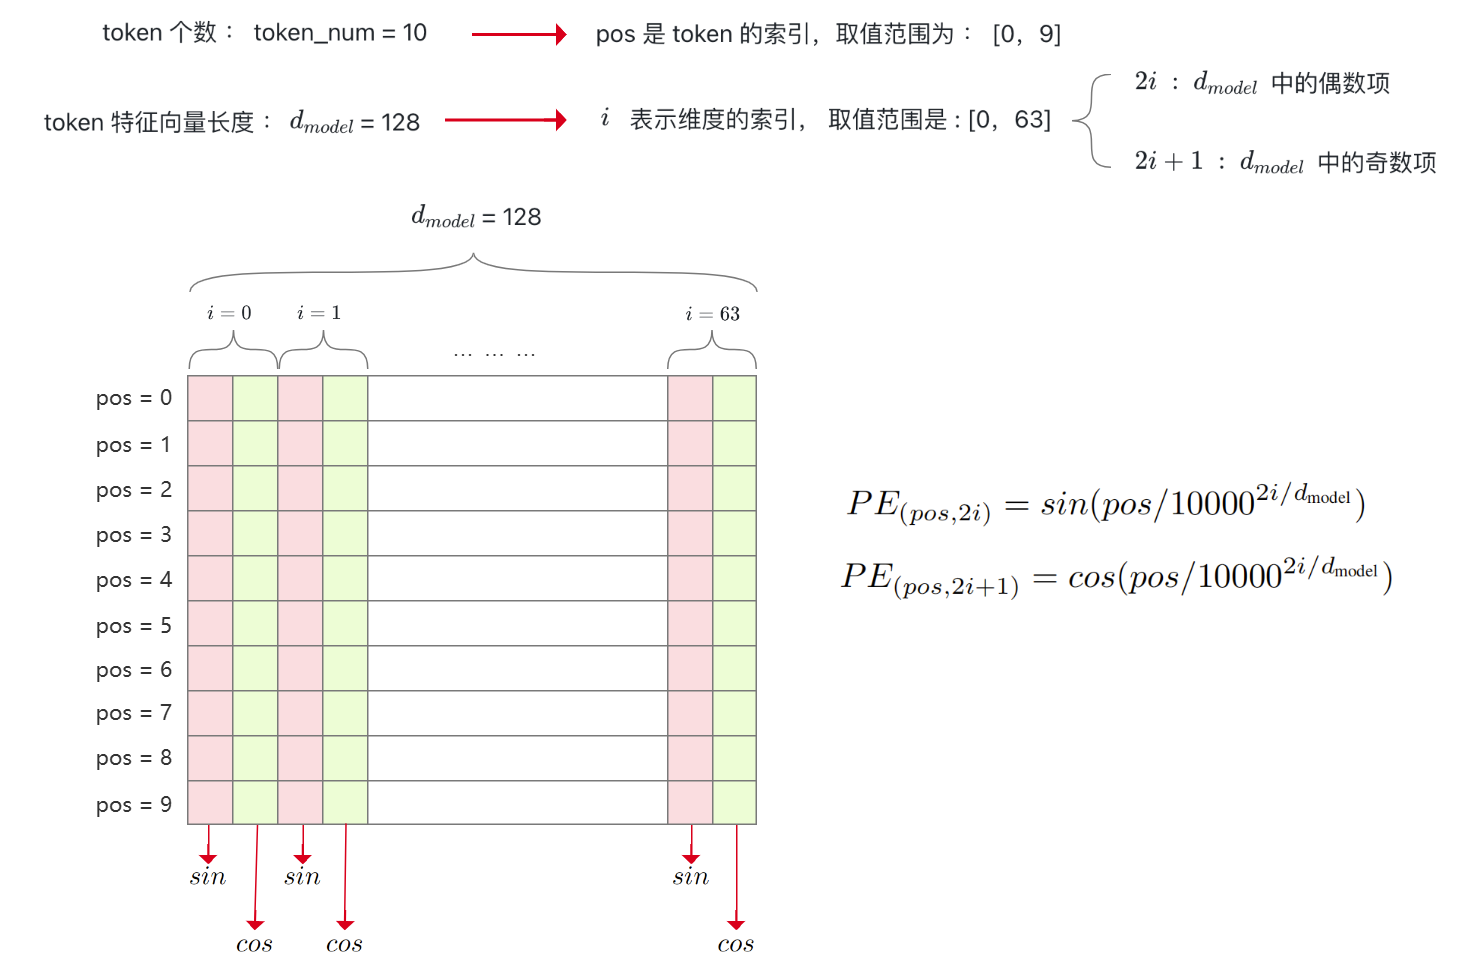

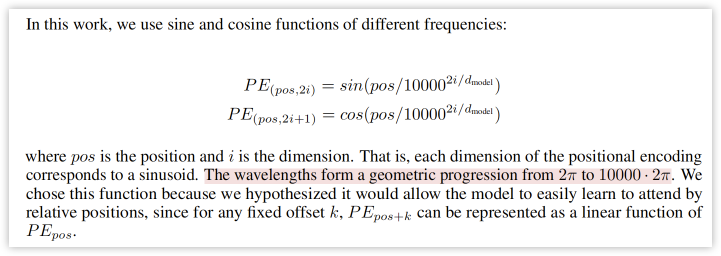

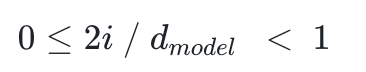

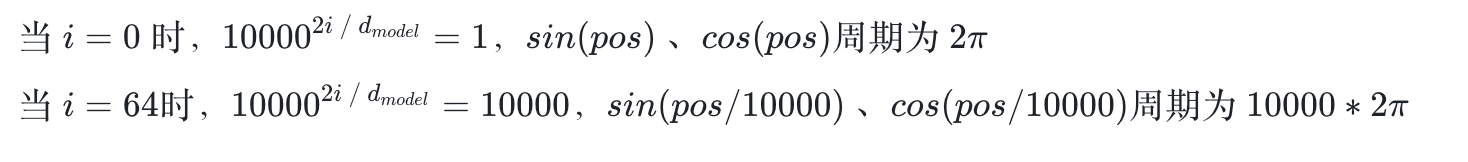

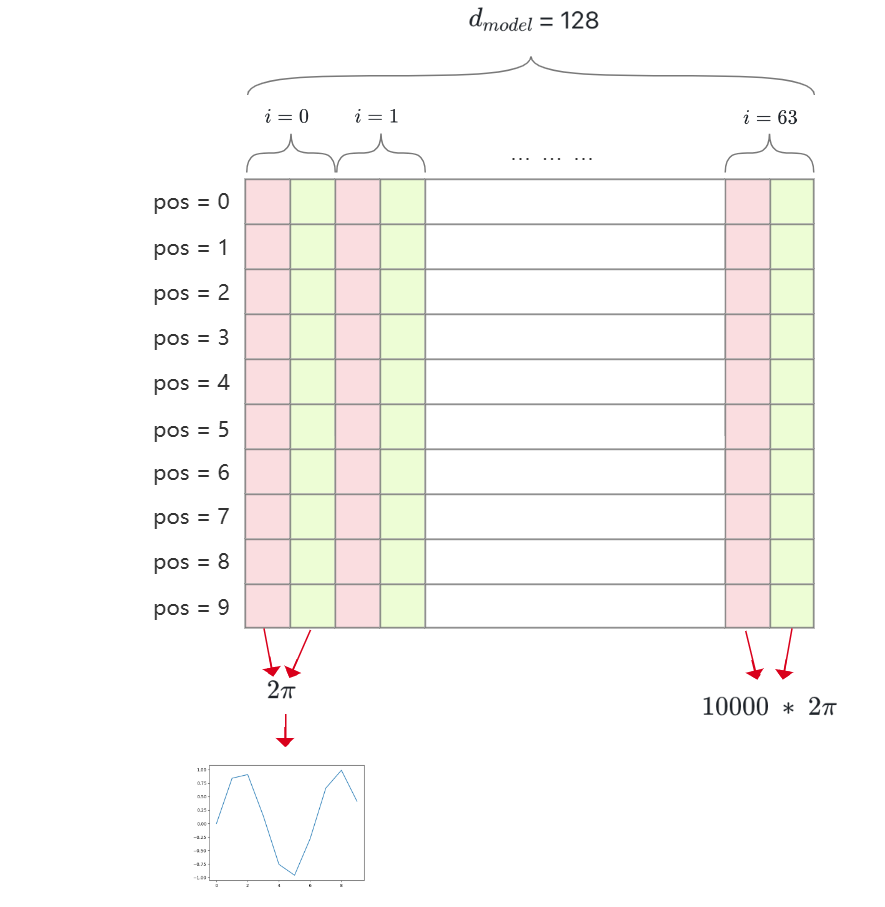

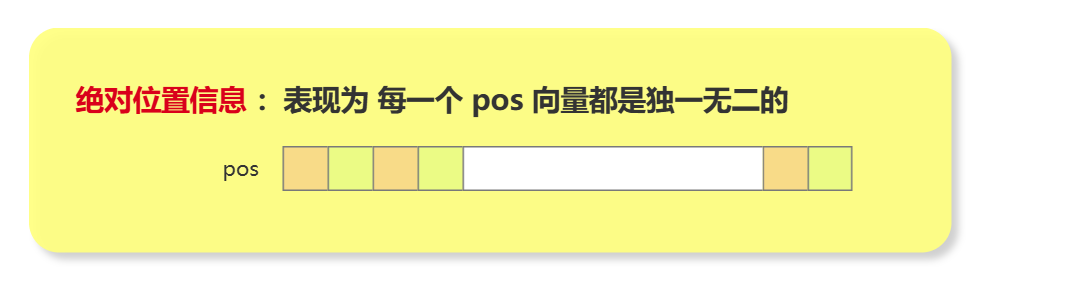

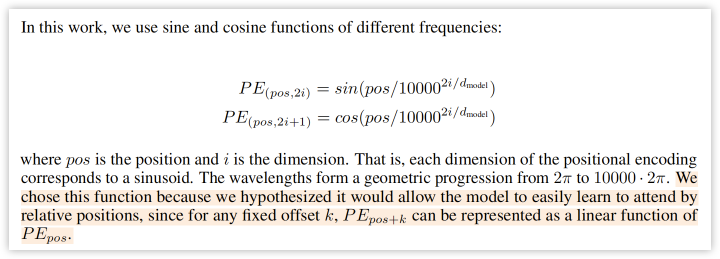

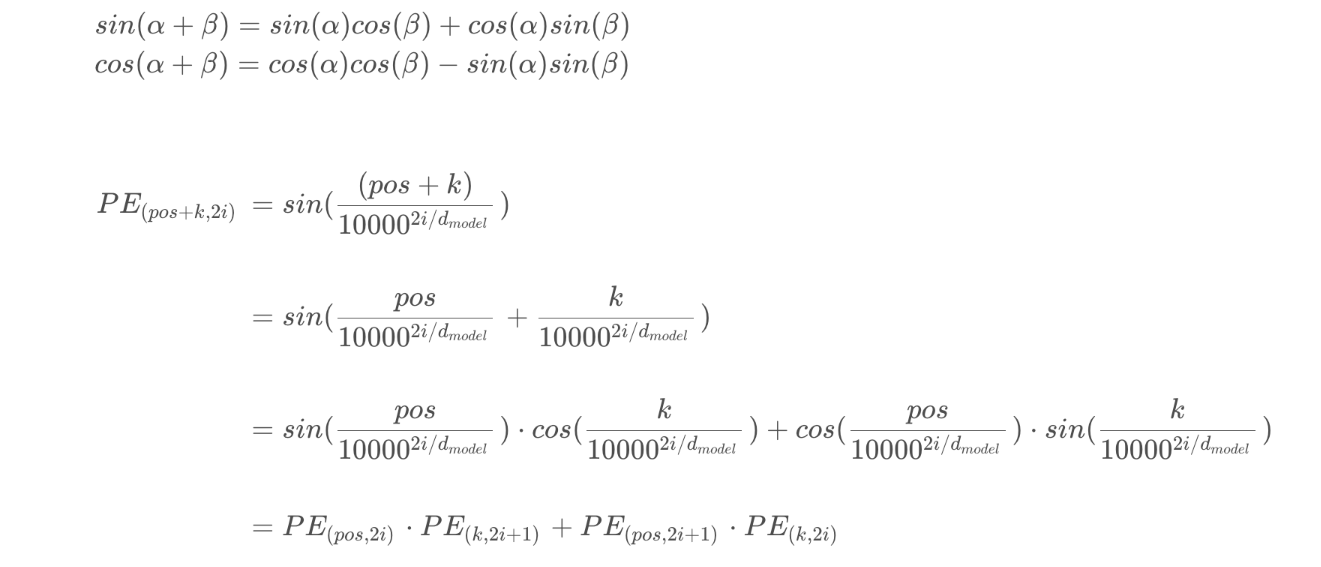

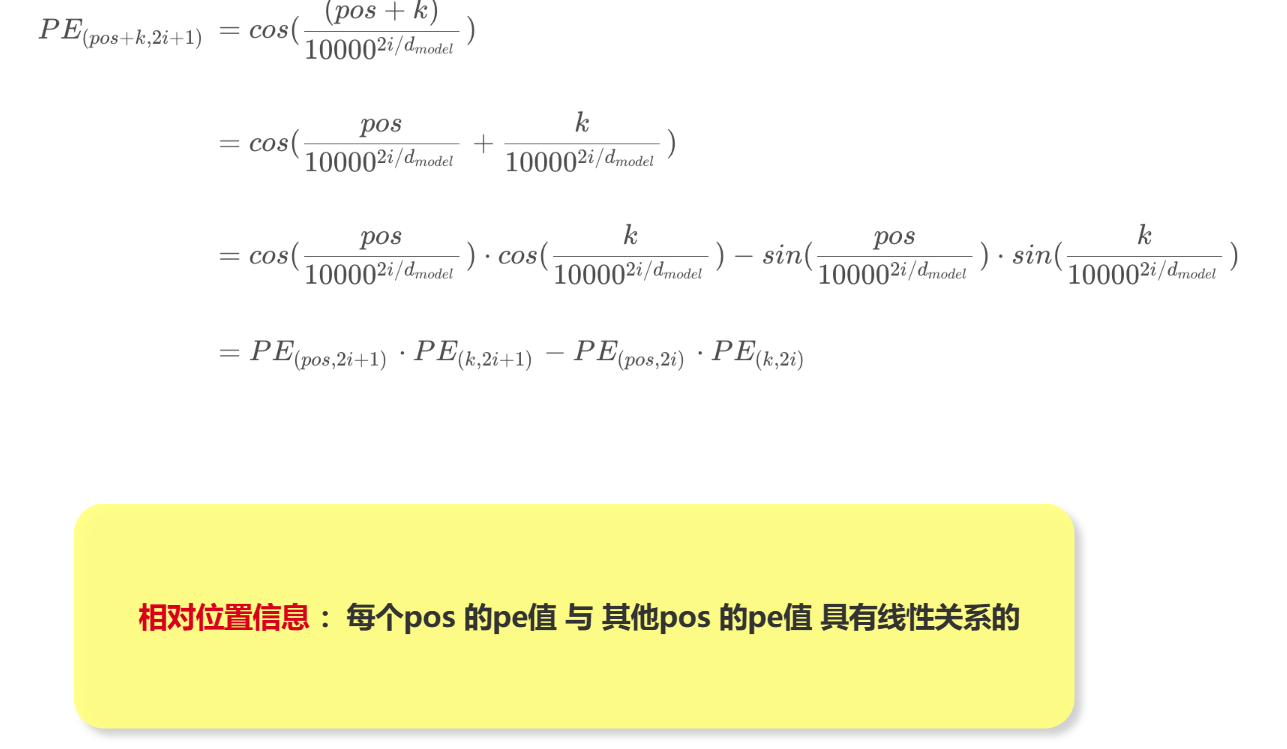

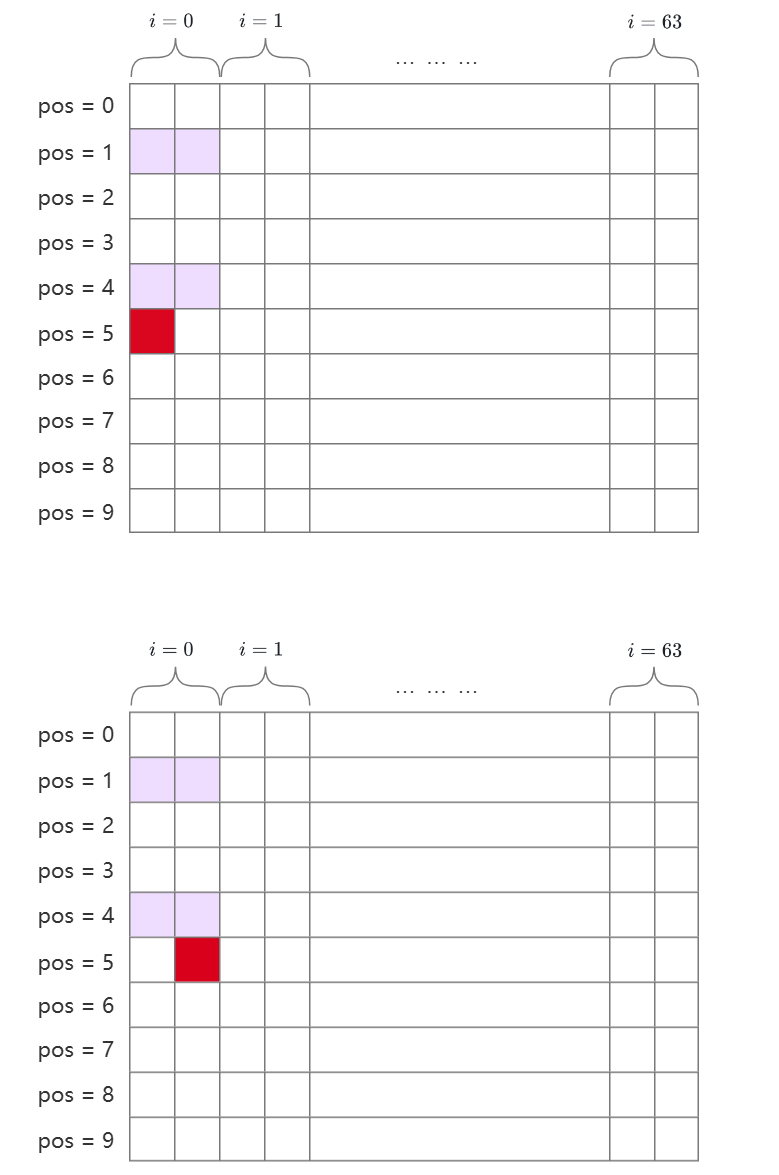

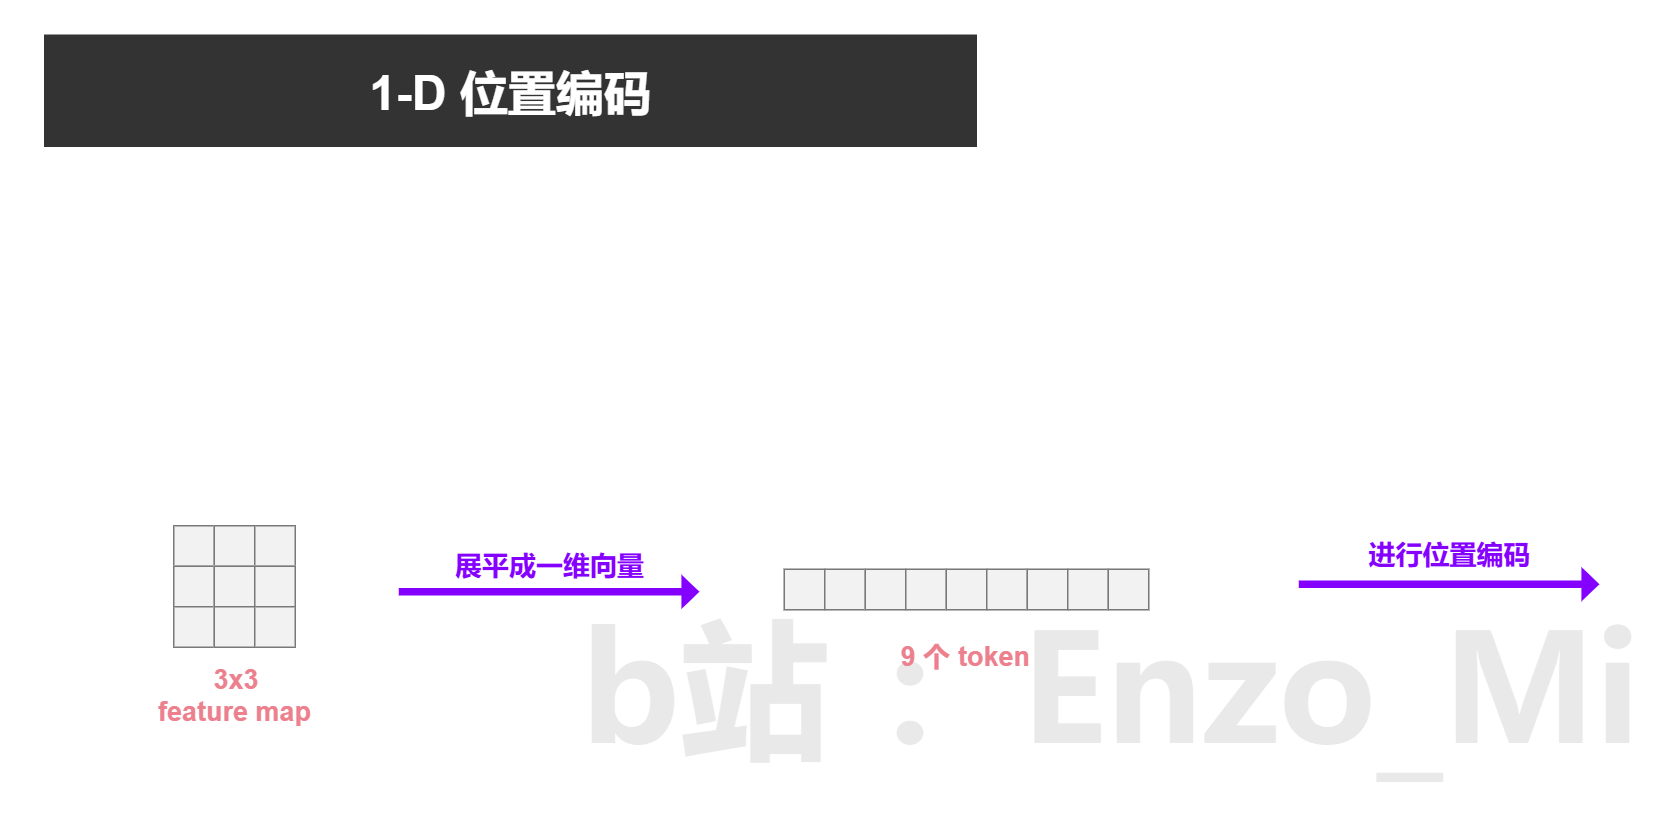

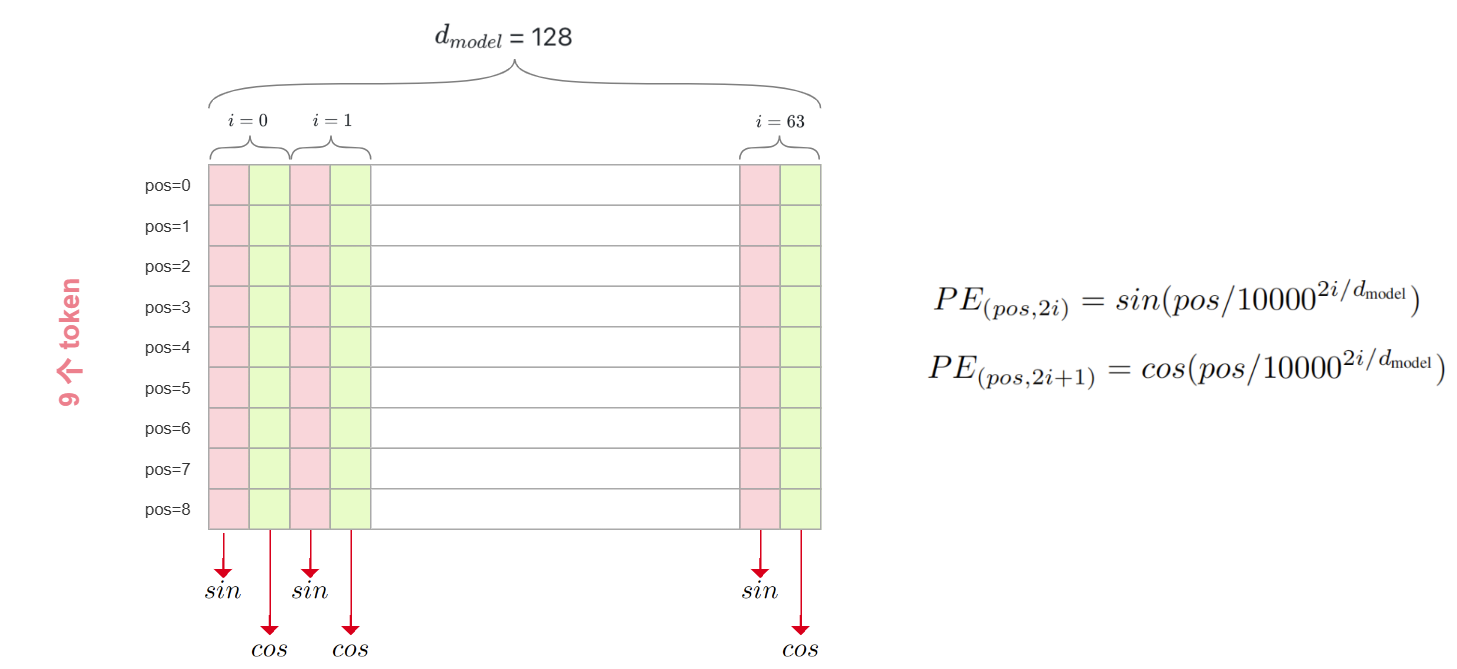

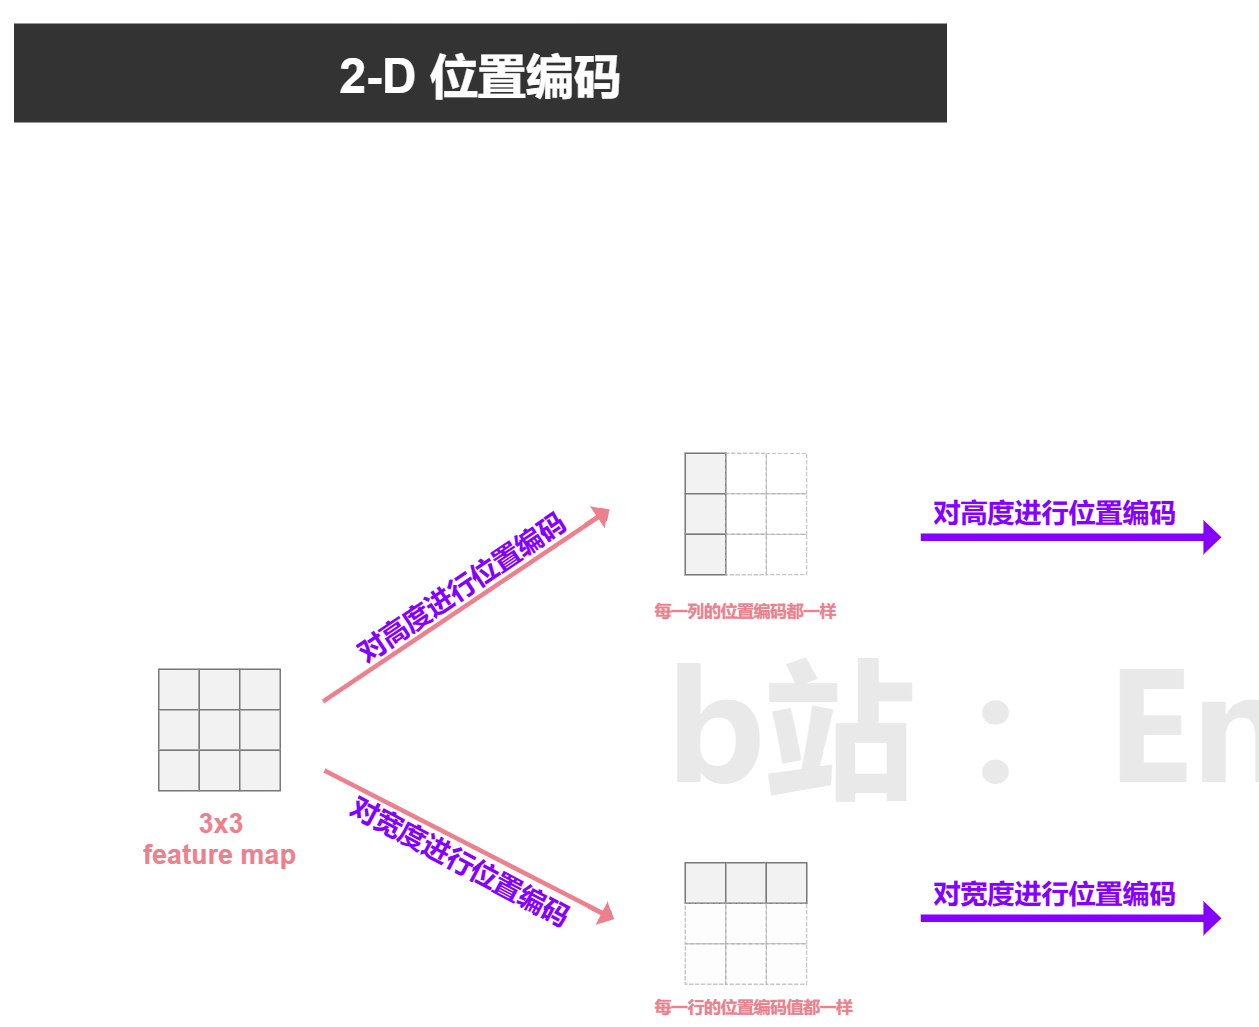

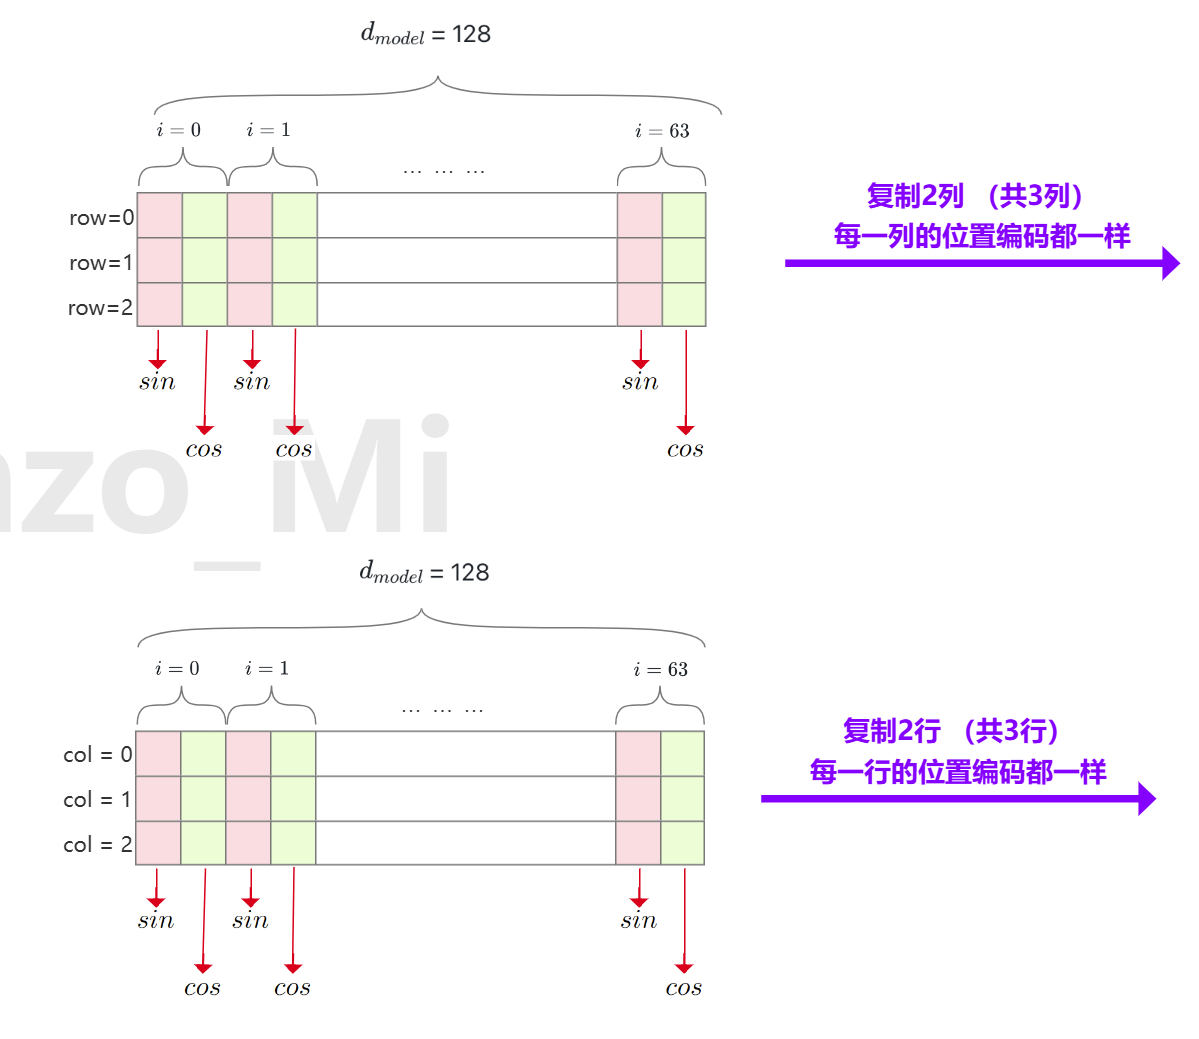

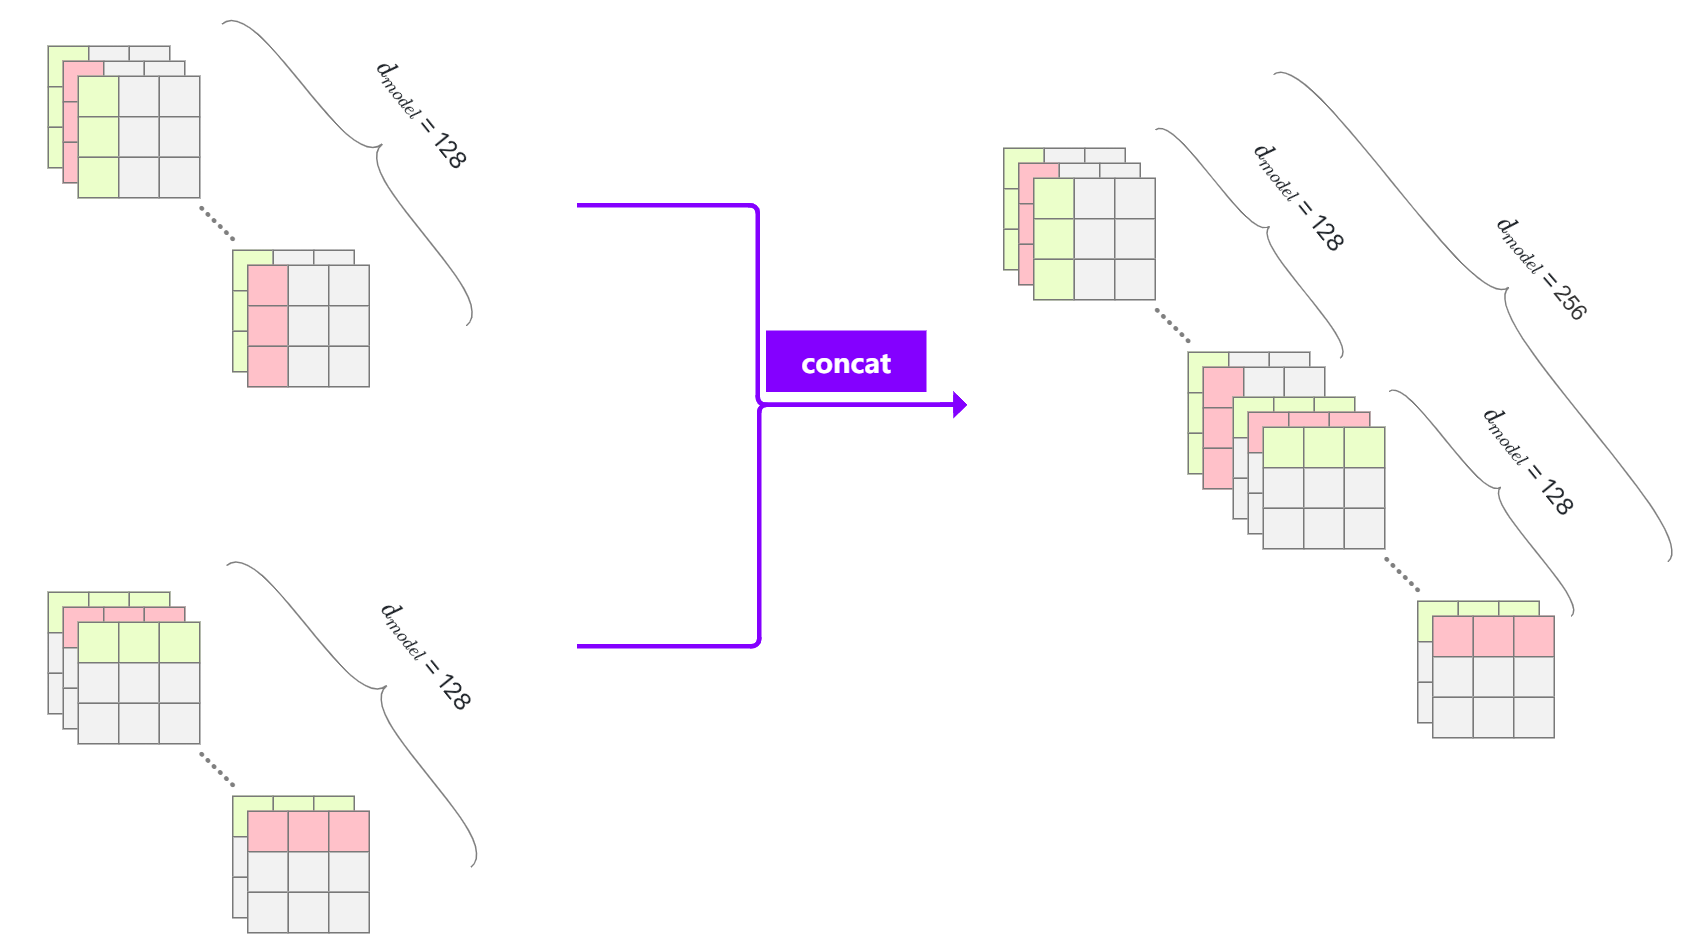

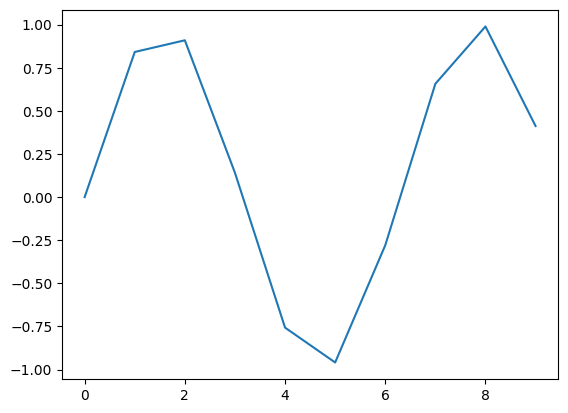

In [1]:
'''
代码来自 : https://github.com/wzlxjtu/PositionalEncoding2D/blob/master/positionalembedding2d.py
'''

import torch
import math
import matplotlib.pyplot as plt


def positional_encoding(d_model, length):
    """
    :param d_model: dimension of the token
    :param length: (maximum) token number
    :return: length*d_model position matrix
    """
    if d_model % 2 != 0:
        raise ValueError("Cannot use sin/cos positional encoding with "
                         "odd dim (got dim={:d})".format(d_model))
    pe = torch.zeros(length, d_model)
    position = torch.arange(0, length).unsqueeze(1)
    div_term = torch.exp((torch.arange(0, d_model, 2, dtype=torch.float) *
                         -(math.log(10000.0) / d_model)))
    pe[:, 0::2] = torch.sin(position.float() * div_term)
    pe[:, 1::2] = torch.cos(position.float() * div_term)

    return pe


pe = positional_encoding(128, 10)
plt.plot(range(10), pe[:, 0])
plt.show()

In [2]:
'''
代码来自 : https://github.com/jadore801120/attention-is-all-you-need-pytorch/blob/master/transformer/Models.py
'''

import torch
import torch.nn as nn
import numpy as np


class PositionalEncoding(nn.Module):

    def __init__(self, d_hid, n_position=200):
        super(PositionalEncoding, self).__init__()

        self.register_buffer('pos_table', self._get_sinusoid_encoding_table(n_position, d_hid))

    def _get_sinusoid_encoding_table(self, n_position, d_hid):
        def get_position_angle_vec(position):
            return [position / np.power(10000, 2 * (hid_j // 2) / d_hid) for hid_j in range(d_hid)]

        sinusoid_table = np.array([get_position_angle_vec(pos_i) for pos_i in range(n_position)])
        sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
        sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1

        return torch.FloatTensor(sinusoid_table).unsqueeze(0)

    def forward(self, x):
        return x + self.pos_table[:, :x.size(1)].clone().detach()